In [117]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/GitHub/dynamics-simulation-16-715/lecture-notebooks/Lecture 4/Project.toml`


In [118]:
using LinearAlgebra
using PyPlot
using ForwardDiff

In [224]:
ℓ = 1.0
m = 1.0
c = 1.0
g = 9.81

function f(x)
    #pendulum dynamics
    
    θ = x[1]
    θ̇ = x[2]
    
    ẋ = [θ̇; -(g/ℓ)*sin(θ) - (c/m)*θ̇]
end

f (generic function with 1 method)

In [225]:
function explicit_midpoint_step(xk)
    xm = xk + 0.5*h*f(xk)
    xn = xk + h*f(xm)
end

explicit_midpoint_step (generic function with 1 method)

In [226]:
function rk4_step(xk)
    f1 = f(xk)
    f2 = f(xk + 0.5*h*f1)
    f3 = f(xk + 0.5*h*f2)
    f4 = f(xk + h*f3)
    
    xn = xk + (h/6.0).*(f1 + 2*f2 + 2*f3 + f4)
end

rk4_step (generic function with 1 method)

In [227]:
function implicit_euler_step(xk)
    xn = xk
    r = xn - xk - h*f(xn)
    while maximum(abs.(r)) > 1e-12
        R = ForwardDiff.jacobian(x -> x-xk-h*f(x), xn)
        Δxn = -R\r
        xn += Δxn
        r = xn - xk - h*f(xn)
    end
    
    return xn
end

implicit_euler_step (generic function with 1 method)

In [228]:
function implicit_midpoint_step(xk)
    xn = xk
    r = xn - xk - h*f(0.5*xk + 0.5*xn)
    while maximum(abs.(r)) > 1e-12
        R = ForwardDiff.jacobian(x -> x-xk-h*f(0.5*xk + 0.5*x), xn)
        Δxn = -R\r
        xn += Δxn
        r = xn - xk - h*f(0.5*xk + 0.5*xn)
    end
    
    return xn
end

implicit_midpoint_step (generic function with 1 method)

In [229]:
function simulate_explicit_mid!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= explicit_midpoint_step(xtraj[:,k])
    end
end

simulate_explicit_mid! (generic function with 1 method)

In [230]:
function simulate_rk4!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= rk4_step(xtraj[:,k])
    end
end

simulate_rk4! (generic function with 1 method)

In [231]:
function simulate_implicit_euler!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= implicit_euler_step(xtraj[:,k])
    end
end

simulate_implicit_euler! (generic function with 1 method)

In [232]:
function simulate_implicit_mid!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= implicit_midpoint_step(xtraj[:,k])
    end
end

simulate_implicit_mid! (generic function with 1 method)

In [233]:
Tf = 10.0
h = 0.1 #10 Hz
N = Int(floor(Tf./h + 1))
thist = h.*Array(0:(N-1));

In [234]:
x0 = [90*(pi/180); 0.0]
xtraj1 = zeros(2,N)
xtraj2 = zeros(2,N)
xtraj3 = zeros(2,N)
xtraj4 = zeros(2,N)
xtraj1[:,1] = x0;
xtraj2[:,1] = x0;
xtraj3[:,1] = x0;
xtraj4[:,1] = x0;

In [235]:
simulate_explicit_mid!(xtraj1, N)

In [236]:
simulate_rk4!(xtraj2, N)

In [237]:
simulate_implicit_euler!(xtraj3, N)

In [238]:
simulate_implicit_mid!(xtraj4, N)

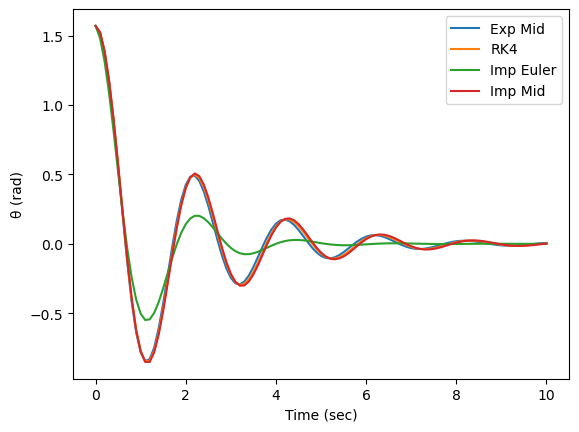

PyObject <matplotlib.legend.Legend object at 0x1e2303400>

In [240]:
plot(thist,xtraj1[1,:])
plot(thist,xtraj2[1,:])
plot(thist,xtraj3[1,:])
plot(thist,xtraj4[1,:])
xlabel("Time (sec)")
ylabel("θ (rad)")
legend(["Exp Mid", "RK4", "Imp Euler", "Imp Mid"])

In [ ]:
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo

vis = Visualizer()
TrajOptPlots.set_mesh!(vis, RobotZoo.Pendulum())
render(vis)

In [ ]:
X1 = [SVector{2}(x) for x in eachcol(xtraj4)];
visualize!(vis, RobotZoo.Pendulum(), thist[end], X1)